# Figure 4: Convergence of the cost of the N-player Equilibrium to cost of the mean-field equilibrium

In [2]:
import numpy as np
import time
import matplotlib.pyplot as plt
from mfg_computation import Parameters, mf_equilibrium, mf_optimum, get_equilibrium_n_players

In [3]:
PARAMS = Parameters() # default parameters from paper
gamma = PARAMS.gamma # infection rate
rho = PARAMS.rho     # recovery rate
vac_min, theta = PARAMS.vac_min, PARAMS.theta # min/max vaccination rate
T = PARAMS.T # time horizon

c_V = PARAMS.c_V       # cost per unit time of vaccination
c_I = PARAMS.c_I      # cost per unit time of infection

# initial conditions
S0 = 0.4        # proportion of susceptible at t=0
I0 = 0.4        # proportion of infected at t=0


In [4]:
cost_mfe, thr = mf_equilibrium(PARAMS, S0, I0, C=10000);
print("Cost of the mean-field equilibrium when the initial state is ", S0,I0)
print(cost_mfe)

Cost of the mean-field equilibrium when the initial state is  0.4 0.4
0.6824920612041248


In [5]:
values_of_N = np.array([10,20,30,50])
costs = []
for N in values_of_N:
    BR_pol, Js, Ji = get_equilibrium_n_players(N)
    costs.append(Js[0,int(S0*N),int(I0*N)]*S0+Ji[0,int(S0*N),int(I0*N)]*I0)

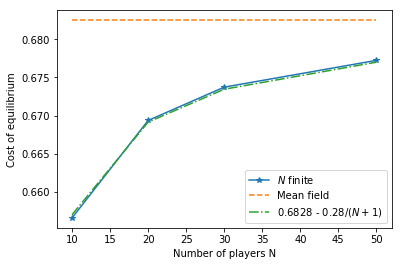

In [6]:
b=0.28
fig = plt.figure()
fig.set_size_inches((6,4))
plt.plot(values_of_N,costs,'*-')
plt.plot(values_of_N,np.ones(len(values_of_N))*cost_mfe,'--')
plt.plot(values_of_N,cost_mfe-b/(values_of_N+1),'-.')

plt.legend(['$N$ finite','Mean field',
            '0.6828 - $0.28/(N+1)$'])
plt.xlabel('Number of players N')
plt.ylabel('Cost of equilibrium')
plt.savefig('valuefunction_DEC.pdf', bbox_inches='tight')